<a href="https://colab.research.google.com/github/FirstStep0/MachineLearning/blob/main/MachineLearningPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Постановка задачи

 Обучить нейросеть для решения задачи классификации на 2ух классах. Объекты первого и второго класса - это квартиры, имеющие соответственно цену больше и меньше медианы стоимости квартир.

Импортируем необходимые библиотеки:

In [1239]:
from google.colab import files
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
import zipfile
import requests

Извлечем данные из zip архива:

In [1240]:
with zipfile.ZipFile('dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [1241]:
#file = open('house_prices.csv', mode='r')
data = pd.read_csv('house_prices.csv')

Описание столбцов:

In [1242]:
data.columns

Index(['Index', 'Title', 'Description', 'Amount(in rupees)',
       'Price (in rupees)', 'location', 'Carpet Area', 'Status', 'Floor',
       'Transaction', 'Furnishing', 'facing', 'overlooking', 'Society',
       'Bathroom', 'Balcony', 'Car Parking', 'Ownership', 'Super Area',
       'Dimensions', 'Plot Area'],
      dtype='object')

* Title - информация о кол-ве комнат, готовности к заселению и о местоположении недвижимости.
* Description - описание недвижимости.
* Amount(in rupees) - итоговая стоимость
* Price (in rupees) - цена за квадратный фут
* location - название города, в котором находится недвижимость
* Carpet Area - полезная площадь квартиры (площадь спальни + гостиной + балкона + туалета - толщина внутренних стен)
* Status - статус недвижимости
* Floor - этаж
* Transaction - сделка (перепродажа или новая недвижимость)
* Furnishing - наличие мебели (полное,частичное или нет)
* facing - сторона света, на которую выходят окна
* overlooking - вид из окна
* Society - название жилого комплекса
* Bathroom - количество ванных комнат
* Balcony - количество балконов
* Car Parking - количество и тип парковочных мест (открытая или закрытая парковка)
* Ownership - право собственности (владение всей недвижимостью, т.е. freehold или её долей, т.е. Co-operative Society)
* Super Area - суперзастроенная полощадь (площадь с учетом пропорциональной части от общей недвижимости)
* Dimensions - размеры
* Plot Area - площадь участка

Переименуем столбцы 'Amount(in rupees)' и 'Price (in rupees)'

In [1243]:
data = data.rename(columns={'Amount(in rupees)': 'Amount', 'Price (in rupees)':'Price'})

In [1244]:
data.count()

Index          187531
Title          187531
Description    184508
Amount         187531
Price          169866
location       187531
Carpet Area    106858
Status         186916
Floor          180454
Transaction    187448
Furnishing     184634
facing         117298
overlooking    106095
Society         77853
Bathroom       186703
Balcony        138596
Car Parking     84174
Ownership      122014
Super Area      79846
Dimensions          0
Plot Area           0
dtype: int64

Можем заметить, что в столбцах 'Dimensions' и 'Plot Area' нет значений, отличных от null

Первые строки:

In [1245]:
data.head()

,Index,Title,Description,Amount,Price,location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


Рассмотрим уникальные значения некоторых столбцов:

In [1246]:
data['Status'].unique()

array(['Ready to Move', nan], dtype=object)

Можем заметить, что в столбце 186916 из 187531 значений равны 'Ready to Move', остальные это null

In [1247]:
data['Title'].unique()

array(['1 BHK Ready to Occupy Flat for sale in Srushti Siddhi Mangal Murti Complex Bhiwandi',
       '2 BHK Ready to Occupy Flat for sale in Dosti Vihar Pokhran Road',
       '2 BHK Ready to Occupy Flat for sale in Sunrise by Kalpataru Kolshet Road',
       ...,
       '2 BHK Ready to Occupy Flat for sale in Jaivee Radha Enclave Peer Muchalla',
       '4 BHK Ready to Occupy Flat for sale Nagla Road',
       '2 BHK Ready to Occupy Flat for sale in Friends Enclave Kishanpura'],
      dtype=object)

In [1248]:
data['Ownership'].unique()

array([nan, 'Freehold', 'Co-operative Society', 'Power Of Attorney',
       'Leasehold'], dtype=object)

In [1249]:
data['Car Parking'].unique()

array([nan, '1 Open', '1 Covered', '2 Covered', '66 Covered',
       '701 Covered', '3 Covered', '1 Covered,', '35 Open', '4 Open',
       '323 Covered', '4 Covered,', '11 Covered', '103 Open',
       '203 Covered', '2 Open', '180 Covered', '14 Open', '50 Open',
       '10 Covered', '15 Open', '5 Open', '7 Covered', '4 Covered',
       '509 Covered,', '6 Covered', '101 Covered', '5 Covered,',
       '6 Covered,', '3 Covered,', '123 Covered', '505 Covered',
       '402 Covered', '8 Covered', '5 Covered', '2 Covered,',
       '103 Covered', '12 Covered,', '202 Open', '202 Covered',
       '20 Covered,', '503 Open', '401 Covered', '3 Open', '501 Covered',
       '10 Covered,', '147 Covered', '20 Covered', '310 Covered',
       '204 Covered', '313 Covered', '302 Covered', '442 Covered',
       '23 Covered', '201 Covered,', '8 Open', '112 Covered',
       '14 Covered', '706 Covered', '107 Covered', '120 Covered',
       '250 Covered', '255 Covered', '11 Open', '217 Covered',
       '12 Cove

In [1250]:
data['location'].unique()

array(['thane', 'navi-mumbai', 'nagpur', 'mumbai', 'ahmedabad',
       'bangalore', 'chennai', 'gurgaon', 'hyderabad', 'indore', 'jaipur',
       'kolkata', 'lucknow', 'new-delhi', 'noida', 'pune', 'agra',
       'ahmadnagar', 'allahabad', 'aurangabad', 'badlapur', 'belgaum',
       'bhiwadi', 'bhiwandi', 'bhopal', 'bhubaneswar', 'chandigarh',
       'coimbatore', 'dehradun', 'durgapur', 'ernakulam', 'faridabad',
       'ghaziabad', 'goa', 'greater-noida', 'guntur', 'guwahati',
       'gwalior', 'haridwar', 'jabalpur', 'jamshedpur', 'jodhpur',
       'kalyan', 'kanpur', 'kochi', 'kozhikode', 'ludhiana', 'madurai',
       'mangalore', 'mohali', 'mysore', 'nashik', 'navsari', 'nellore',
       'palakkad', 'palghar', 'panchkula', 'patna', 'pondicherry',
       'raipur', 'rajahmundry', 'ranchi', 'satara', 'shimla', 'siliguri',
       'solapur', 'sonipat', 'surat', 'thrissur', 'tirupati', 'trichy',
       'trivandrum', 'udaipur', 'udupi', 'vadodara', 'vapi', 'varanasi',
       'vijayawada',

In [1251]:
data['Society'].unique()

array(['Srushti Siddhi Mangal Murti Complex', 'Dosti Vihar',
       'Sunrise by Kalpataru', ..., 'Silver City Greens',
       'Nirmaan Royale Empire', 'Jaivee Radha Enclave'], dtype=object)

In [1252]:
data['Transaction'].unique()

array(['Resale', 'New Property', nan, 'Other', 'Rent/Lease'], dtype=object)

In [1253]:
data['Furnishing'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished', nan], dtype=object)

Удалим столбцы 'Dimensions', 'Plot Area', 'Status'

In [1254]:
if('Dimensions' in data.columns): del data['Dimensions']
if('Plot Area' in data.columns): del data['Plot Area']
if('Status' in data.columns): del data['Status']

# Преобразуем значения строк в числовой тип данных

Можно заметить, что полезная информация в некоторых столбцах представлена строкой. Преобразуем значения этих столбцов в числовой тип данных.

Выделим из столбца 'Carpet Area' значения площади и внесем его в столбец 'square'

In [1255]:
import re
re_digits = re.compile(r"\b\d+\b")
def assign_square(row):
  if type(row['Carpet Area']) == float:
      return np.nan
  else:
      res = re.split(",| ", row['Carpet Area']);
      back = res[len(res) - 1]
      res.pop()
      val = int(''.join(res))
      if back == 'sqyrd':
        val = val * 9.0
      elif back == 'sqm':
        val = val * 10.764
      elif back == 'sqft':
        val = val * 1.0
      elif back == 'marla':
        val = val * 272.25
      elif back == 'kanal':
        val = val * 5445.0
      elif back == 'ground':
        val = val * 2400.352
      elif back == 'aankadam':
        val = val * 72.0
      elif back == 'biswa2':
        val = val * 1350.0
      elif back == 'acre':
        val = val * 43560.0
      elif back == 'hectare':
        val = val * 107639.0
      elif back == 'cent':
        val = val * 435.56
      else:
        print(row['Super Area'])
      return round(val)
data['square'] = data.apply(assign_square, axis=1)

nan


Выделим из столбца 'Title' количество комнат и внесем его в столбец 'count_room'. В столбце 'Society' и 'Title' дублируется информация о названии жилого комплекса, но не все строки в столбце 'Society' заполнены. Заполним пропуски в столбце 'Society' значениями из столбца 'Title'.

In [1256]:
import re
re_digits = re.compile(r"\b\d+\b")
def assign_count_room(row):
    res = re_digits.findall(row['Title'])
    if(len(res) > 0):
      return int(res[0])
    else:
      return np.nan
data['count_room'] = data.apply(assign_count_room, axis=1)

In [1257]:
def assign_society(row):
    res = row['Title'].split()
    if('in' in res):
      if(res.index('in') == res.index('sale') + 1):
        return (' '.join(res[res.index('in')+1:]))
    else:
        return (' '.join(res[res.index('sale')+1:]))
data['Society'] = data.apply(assign_society, axis=1)

Выделим из столбца 'Amount' стоимость квартиры и внесем его в этот же столбец

In [1258]:
def assign_amount(row):
    res = row['Amount'].split()
    if len(res) == 2:
      cost = float(res[0])
      if res[1] == 'Lac':
        cost = cost * 1e5
      elif res[1] == 'Cr':
        cost = cost * 1e7
      return cost
    else:
        return np.nan
data['Amount'] = data.apply(assign_amount, axis=1)

Выделим из столбца 'floor' кол-во квартир и максимальное кол-во квартир и внесем его в столбец 'floor' и 'max_floor' соответственно.

In [1259]:
import re
re_digits = re.compile(r"\b\d+\b")
def assign_max_floor(row):
    #print(row['Floor'])
    if type(row['Floor']) == float:
      return np.nan
    else:
      res = re.findall(re_digits, row['Floor'])
      if len(res) == 2:
        return int(res[1])
      else:
        return np.nan
data['max_floor'] = data.apply(assign_max_floor, axis=1)

In [1260]:
import re
re_digits = re.compile(r"\b\d+\b")
def assign_floor(row):
   #print(row['Floor'])
    if type(row['Floor']) == float:
      return np.nan
    else:
      res = re.findall(re_digits, row['Floor'])
      if len(res) == 2:
        return int(res[0])
      else:
        return np.nan
data['Floor'] = data.apply(assign_floor, axis=1)

Выделим из столбца 'Car Parking' кол-во парковочных мест и тип парковочного места и внесем его в столбец 'count_parking_place' и 'type_parking_place' соответственно.

In [1261]:
def assign_count_pp(row):
   #print(row['Floor'])
    if type(row['Car Parking']) == float:
      return np.nan
    else:
      res = row['Car Parking'].split();
      return int(res[0])
data['count_parking_place'] = data.apply(assign_count_pp, axis=1)

In [1262]:
def assign_type_pp(row):
   #print(row['Floor'])
    if type(row['Car Parking']) == float:
      return np.nan
    else:
      res = row['Car Parking'].split()[1];
      if(res[-1] == ','):
        res = res[:-1]
      return res
data['type_parking_place'] = data.apply(assign_type_pp, axis=1)

Выделим из столбца 'Super Area' значения суперплощади и переведем ее в футы. Кроме того, не все строки в столбце 'Super Area' заполнены. Воспользуемся тем, что Super Area равен отношению Amount и Price. Заполним пропуски в столбце 'Super Area'

In [1263]:
def assign_super_area(row):
    if type(row['Super Area']) == float:
      if np.isnan(row['Amount']) | np.isnan(row['Price']):
        return np.nan
      else:
        if(row['Price'] > 0):
          return round(row['Amount'] / row['Price'])
        else:
          return np.nan
    else:
      res = re.split(",| ", row['Super Area']);
      back = res[len(res) - 1]
      res.pop()
      val = int(''.join(res))
      if back == 'sqyrd':
        val = val * 9.0
      elif back == 'sqm':
        val = val * 10.764
      elif back == 'sqft':
        val = val * 1.0
      elif back == 'marla':
        val = val * 272.25
      elif back == 'kanal':
        val = val * 5445.0
      elif back == 'ground':
        val = val * 2400.352
      elif back == 'aankadam':
        val = val * 72.0
      elif back == 'aankadam':
        val = val * 72.0
      elif back == 'biswa2':
        val = val * 1350.0
      elif back == 'acre':
        val = val * 43560.0
      elif back == 'hectare':
        val = val * 107639.0
      elif back == 'cent':
        val = val * 435.56
      else:
        print(row['Super Area'])
      return round(val)
data['Super Area'] = data.apply(assign_super_area, axis=1)

Поменяем тип данных столбцов 'Balcony' и 'Bathroom'

In [1264]:
import re
re_digits = re.compile(r"\b\d+\b")
def assign_balcony(row):
  if type(row['Balcony']) == float:
      return np.nan
  else:
    #print(row['Balcony'])
    res = re.findall(re_digits, row['Balcony'])
    #print(res)
    return int(res[0])
data['Balcony'] = data.apply(assign_balcony, axis=1)

def assign_bathroom(row):
  if type(row['Bathroom']) == float:
      return np.nan
  else:
    res = re.findall(re_digits, row['Bathroom'])
    return int(res[0])
data['Bathroom'] = data.apply(assign_bathroom, axis=1)

Можем удалить столбцы 'Title' и 'Carpet Area', так как вся полезная информация есть в столбцах 'count_room', 'Society' и 'square'. Столбец 'Description' хранит информацию о местоположении недвижимости, кол-ве комнат, готовность к заселению. Так как эта информация есть в других полях, то также можем удалить этот столбец.

In [1265]:
if('Title' in data.columns): del data['Title']
if('Carpet Area' in data.columns): del data['Carpet Area']
if('Description' in data.columns): del data['Description']
if('Car Parking' in data.columns): del data['Car Parking']
if('Index' in data.columns): del data['Index']
# Для увеличения кол-ва данных без nan удалим эти столбцы
if('overlooking' in data.columns): del data['overlooking']
if('facing' in data.columns): del data['facing']

После преобразований данные выглядят так:

In [1266]:
data.head()

,Amount,Price,location,Floor,Transaction,Furnishing,Society,Bathroom,Balcony,Ownership,Super Area,square,count_room,max_floor,count_parking_place,type_parking_place
0,4200000.0,6000.0,thane,10.0,Resale,Unfurnished,Srushti Siddhi Mangal Murti Complex Bhiwandi,1.0,2.0,NaN,700.0,500.0,1.0,11.0,NaN,NaN
1,9800000.0,13799.0,thane,3.0,Resale,Semi-Furnished,Dosti Vihar Pokhran Road,2.0,NaN,Freehold,710.0,473.0,2.0,22.0,1.0,Open
2,14000000.0,17500.0,thane,10.0,Resale,Unfurnished,Sunrise by Kalpataru Kolshet Road,2.0,NaN,Freehold,800.0,779.0,2.0,29.0,1.0,Covered
3,2500000.0,NaN,thane,1.0,Resale,Unfurnished,Kasheli,1.0,1.0,NaN,NaN,530.0,1.0,3.0,NaN,NaN
4,16000000.0,18824.0,thane,20.0,Resale,Unfurnished,TenX Habitat Raymond Realty Pokhran Road,2.0,NaN,Co-operative Society,850.0,635.0,2.0,42.0,1.0,Covered


In [1267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Amount               177847 non-null  float64
 1   Price                169866 non-null  float64
 2   location             187531 non-null  object 
 3   Floor                167694 non-null  float64
 4   Transaction          187448 non-null  object 
 5   Furnishing           184634 non-null  object 
 6   Society              187525 non-null  object 
 7   Bathroom             186703 non-null  float64
 8   Balcony              138596 non-null  float64
 9   Ownership            122014 non-null  object 
 10  Super Area           173470 non-null  float64
 11  square               106858 non-null  float64
 12  count_room           186674 non-null  float64
 13  max_floor            167694 non-null  float64
 14  count_parking_place  84174 non-null   float64
 15  type_parking_plac

Можно заметить, что кол-во значений в столбце 'Super Area' и 'Society', отличных от nan, значительно увеличилось

Оставим только строки без nan

In [1268]:
data = data.dropna()
data.describe()

,Amount,Price,Floor,Bathroom,Balcony,Super Area,square,count_room,max_floor,count_parking_place
count,5.173100e+04,5.173100e+04,51731.000000,51731.00000,51731.000000,51731.000000,51731.000000,51731.000000,51731.000000,51731.000000
mean,1.700416e+07,8.843141e+03,5.546925,2.80358,2.276527,1754.799869,1462.535772,2.952659,10.192496,4.823607
std,3.448093e+07,2.652436e+04,4.649050,0.89457,1.030740,3478.932896,1523.237041,1.200385,7.799769,35.975681
min,3.000000e+05,4.000000e+00,1.000000,1.00000,1.000000,210.000000,1.000000,1.000000,1.000000,1.000000
25%,6.400000e+06,5.000000e+03,2.000000,2.00000,1.000000,1200.000000,908.000000,2.000000,4.000000,1.000000
50%,1.210000e+07,7.337000e+03,4.000000,3.00000,2.000000,1620.000000,1323.000000,3.000000,8.000000,1.000000
75%,2.100000e+07,1.116700e+04,7.000000,3.00000,3.000000,2025.000000,1700.000000,3.000000,14.000000,2.000000
max,5.100400e+09,4.041600e+06,75.000000,10.00000,10.000000,750000.000000,194936.000000,94.000000,91.000000,999.000000


# Избавимся от выбросов

In [1269]:
data.corr()

<ipython-input-1269-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Amount,Price,Floor,Bathroom,Balcony,Super Area,square,count_room,max_floor,count_parking_place
Amount,1.000000,0.921863,0.126973,0.329351,0.122355,0.089207,0.182615,0.179106,0.136293,-0.030283
Price,0.921863,1.000000,0.038079,0.081162,0.038710,0.016107,0.037308,0.047113,0.035558,-0.013192
Floor,0.126973,0.038079,1.000000,0.212212,0.160327,0.052322,0.076263,0.094232,0.761449,-0.005896
Bathroom,0.329351,0.081162,0.212212,1.000000,0.268766,0.191024,0.381389,0.483481,0.167963,-0.075113
Balcony,0.122355,0.038710,0.160327,0.268766,1.000000,0.060420,0.132284,0.207457,0.127445,-0.007489
Super Area,0.089207,0.016107,0.052322,0.191024,0.060420,1.000000,0.166230,0.111107,0.055791,-0.012932
square,0.182615,0.037308,0.076263,0.381389,0.132284,0.166230,1.000000,0.225482,0.081299,-0.031223
count_room,0.179106,0.047113,0.094232,0.483481,0.207457,0.111107,0.225482,1.000000,0.035061,-0.068244
max_floor,0.136293,0.035558,0.761449,0.167963,0.127445,0.055791,0.081299,0.035061,1.000000,-0.031098
count_parking_place,-0.030283,-0.013192,-0.005896,-0.075113,-0.007489,-0.012932,-0.031223,-0.068244,-0.031098,1.000000


Можно заметить, что стоимость квартиры 'Amount' сильно коррелирует с ценой за квадратный фут и слабо коррелирует со всеми остальными значениями

In [1270]:
q = {'':''}
column_names = {'Amount', 'Price', 'Floor', 'Bathroom', 'Balcony', 'Super Area', 'square', 'count_room', 'max_floor', 'count_parking_place'}
for st1 in column_names:
  q[st1] = [data[st1].quantile(0.05), data[st1].quantile(0.995)]
for st1 in column_names:
  rows_to_drop = data[(data[st1] < q[st1][0]) | (data[st1] > q[st1][1])].index
  data = data.drop(rows_to_drop)
data.shape

(44139, 16)

In [1271]:
corr_mat = data.corr()
corr_mat

<ipython-input-1271-79907eedfcac>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = data.corr()


,Amount,Price,Floor,Bathroom,Balcony,Super Area,square,count_room,max_floor,count_parking_place
Amount,1.000000,0.826718,0.227579,0.725791,0.220802,0.820369,0.827059,0.628642,0.246726,-0.080779
Price,0.826718,1.000000,0.178895,0.485991,0.229972,0.445289,0.490984,0.434269,0.137549,-0.087791
Floor,0.227579,0.178895,1.000000,0.180085,0.140133,0.185210,0.097066,0.099836,0.736714,-0.014094
Bathroom,0.725791,0.485991,0.180085,1.000000,0.150652,0.811124,0.771305,0.783883,0.129102,-0.098886
Balcony,0.220802,0.229972,0.140133,0.150652,1.000000,0.176699,0.185124,0.260308,0.108017,-0.010096
Super Area,0.820369,0.445289,0.185210,0.811124,0.176699,1.000000,0.946253,0.769573,0.221023,-0.109903
square,0.827059,0.490984,0.097066,0.771305,0.185124,0.946253,1.000000,0.737697,0.126757,-0.101104
count_room,0.628642,0.434269,0.099836,0.783883,0.260308,0.769573,0.737697,1.000000,-0.024301,-0.142445
max_floor,0.246726,0.137549,0.736714,0.129102,0.108017,0.221023,0.126757,-0.024301,1.000000,-0.046638
count_parking_place,-0.080779,-0.087791,-0.014094,-0.098886,-0.010096,-0.109903,-0.101104,-0.142445,-0.046638,1.000000


После того, как были убраны выбросы, стоимость квартиры стала сильно зависеть также от площади, кол-ва комнат, кол-ва ванных комнат.

# Визуализируем данные

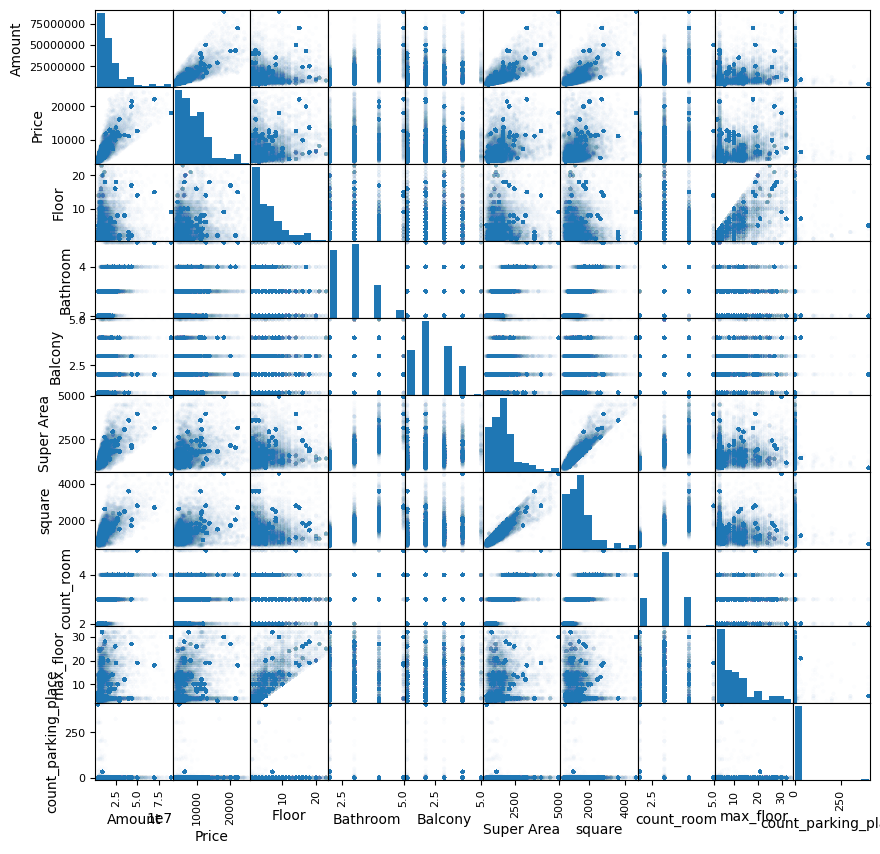

In [1272]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

Характеристики для категориальных признаков:

In [1273]:
data.describe(include=object)

,location,Transaction,Furnishing,Society,Ownership,type_parking_place
count,44139,44139,44139,44139,44139,44139
unique,71,3,3,5588,4,2
top,new-delhi,Resale,Semi-Furnished,Hamdam Apartment Dwarka Sector 18,Freehold,Covered
freq,12304,29595,25782,1648,40468,40176


Отобразим некоторые графики с участием стоимости:

In [1274]:
def show_graph(st1, st2):
  plt.scatter(data[st1], data[st2], alpha=0.01)
  plt.xlabel(st1)
  plt.ylabel(st2)
  plt.title(st1 + ' vs '+ st2)
  plt.show()

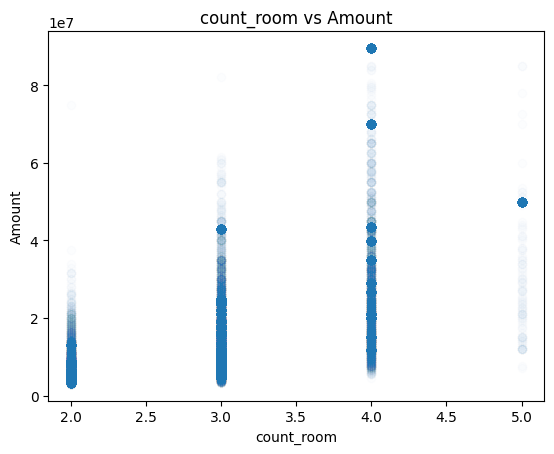

In [1275]:
show_graph('count_room', 'Amount')
pass

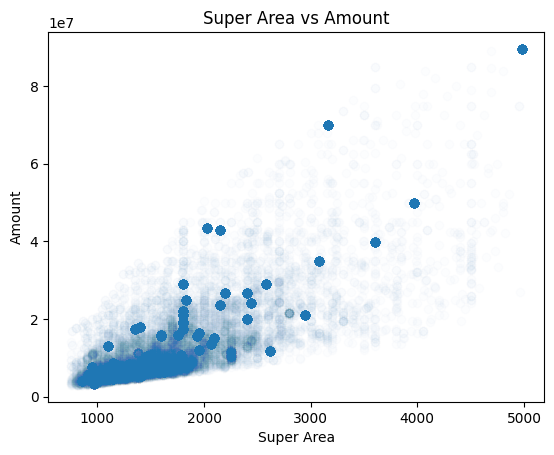

In [1276]:
show_graph('Super Area', 'Amount')
pass

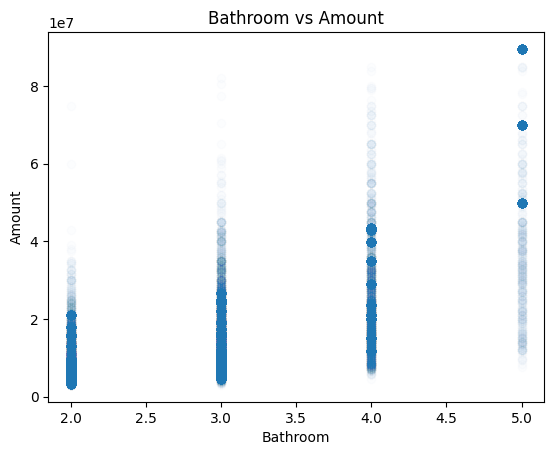

In [1277]:
show_graph('Bathroom', 'Amount')
pass

Отобразим матрицу корреляции в виде тепловой карты:

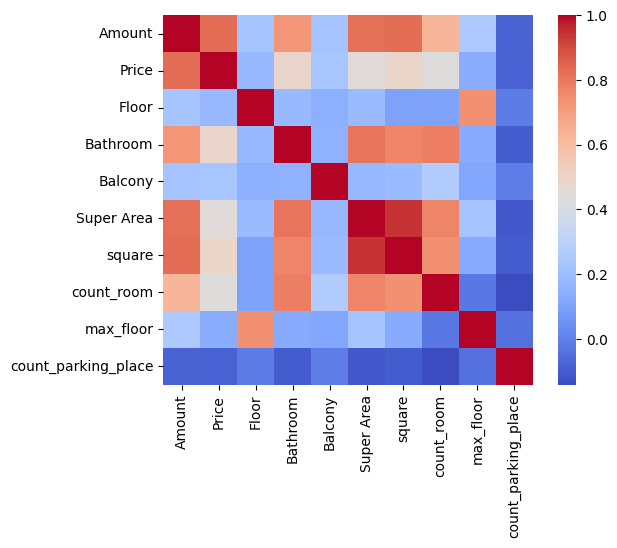

In [1278]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

# Обработаем категориальные признаки

Сделаем замену на числа. До применения:

In [1279]:
data['type_parking_place'].unique()

array(['Covered', 'Open'], dtype=object)

In [1280]:
def change_elem(name_column):
  d = data[name_column].unique()
  index = 0
  for elem in d:
    data.loc[data[name_column] == elem, name_column] = index
    index = index + 1

In [1281]:
name_columns = ['type_parking_place', 'Ownership', 'Society', 'Furnishing', 'Transaction', 'location']
for name in name_columns:
  change_elem(name)

После применения:

In [1282]:
data['type_parking_place'].unique()

array([0, 1], dtype=object)

# Нормализуем количественные признаки

Относительно медианы будем делить на 2 класса:

In [1283]:
data['Amount'].mean()

17641292.50775958

In [1284]:
def norm(name_column):
  data_numerical = data[name_column]
  data[name_column] = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [1285]:
name_columns = ['Amount', 'Price', 'Floor', 'Bathroom', 'Balcony', 'Super Area', 'square', 'count_room', 'max_floor', 'count_parking_place']
for name in name_columns:
  norm(name)

In [1286]:
data.describe()

,Amount,Price,Floor,Bathroom,Balcony,Super Area,square,count_room,max_floor,count_parking_place
count,4.413900e+04,4.413900e+04,4.413900e+04,4.413900e+04,4.413900e+04,4.413900e+04,4.413900e+04,4.413900e+04,4.413900e+04,4.413900e+04
mean,-7.726965e-17,-7.211834e-17,-4.893745e-17,1.030262e-17,2.788147e-16,-3.219569e-17,6.439138e-17,3.863483e-17,9.014793e-17,-2.253698e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.881882e-01,-1.290900e+00,-1.088085e+00,-1.055857e+00,-1.323140e+00,-1.419025e+00,-1.395831e+00,-1.497511e+00,-1.024378e+00,-1.105719e-01
25%,-6.844686e-01,-7.938954e-01,-8.610532e-01,-1.055857e+00,-3.244383e-01,-7.027785e-01,-7.266863e-01,-2.583985e-02,-8.902447e-01,-1.105719e-01
50%,-2.457626e-01,-2.310527e-01,-1.799579e-01,1.393439e-01,-3.244383e-01,-1.445077e-01,-1.523134e-01,-2.583985e-02,-3.537130e-01,-1.105719e-01
75%,2.941833e-01,5.106566e-01,5.011375e-01,1.393439e-01,6.742634e-01,3.856488e-01,2.885178e-01,-2.583985e-02,4.510846e-01,-8.168105e-02
max,4.856726e+00,3.787805e+00,3.906614e+00,2.529745e+00,2.671667e+00,4.241332e+00,4.418259e+00,2.917502e+00,3.133743e+00,1.147467e+01


In [1287]:
data.head(5)

,Amount,Price,location,Floor,Transaction,Furnishing,Society,Bathroom,Balcony,Ownership,Super Area,square,count_room,max_floor,count_parking_place,type_parking_place
9,-0.110776,0.506743,0,-0.634021,0,0,0,0.139344,-1.323140,0,-0.501962,-0.870280,-0.025840,2.194813,-0.110572,0
13,1.677795,1.974508,0,2.771455,0,1,1,1.334545,-1.323140,0,0.823430,0.450778,1.445831,2.194813,-0.081681,0
15,-0.583229,0.242011,0,0.955201,1,0,2,-1.055857,-1.323140,0,-1.218208,-1.193364,-1.497511,0.719351,-0.110572,0
21,-0.077030,1.393019,0,2.090360,0,0,3,-1.055857,-0.324438,0,-0.950453,-1.207724,-1.497511,2.731345,-0.110572,0
28,-0.009536,1.242007,0,0.501137,0,2,4,0.139344,0.674263,0,-0.789799,-0.834381,-0.025840,1.255882,-0.110572,0


# Разобьем данные на обучающую и тестовые выборки

In [1288]:
X = data.drop('Amount', axis = 1)
y = data['Amount']
feature_names = X.columns

In [1289]:
X = X.to_numpy()

Предсказывать результат будем относительно медианы значений из столбца 'Amount'. После нормализации это ноль.

In [1290]:
y = np.array(y > 0, dtype='int')

In [1291]:
y

array([0, 1, 0, ..., 0, 0, 0])

In [1292]:
N, d = X.shape

In [1293]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 28)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

print(N_train, N_test)

30897 13242


# Применим метод k-ближайших соседей

In [1294]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [1295]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)

Ошибка на тестовых данных:

In [1296]:
err_test

0.04017520012082767

# Подберем оптимальный параметр для метода kNN:

In [1297]:
from sklearn.neighbors import KNeighborsClassifier
def iter_knn(n_neighbors):
  knn = KNeighborsClassifier(n_neighbors = n_neighbors)
  knn.fit(X_train, y_train)

  y_test_predict = knn.predict(X_test)
  err_test  = np.mean(y_test  != y_test_predict)
  return err_test

In [1298]:
opt_n = -1
err = 100.0
for i in range(1, 10):
  res = iter_knn(i)
  print(res)
  if res < err:
    err = res
    opt_n = i
print(opt_n, err)

0.025524845189548406
0.02967829632985954
0.028318985047575896
0.032094849720586016
0.03269898806826763
0.03428485123093188
0.03451140311131249
0.03768312943664099
0.038438302371243016
1 0.025524845189548406


In [1299]:
knn = KNeighborsClassifier(n_neighbors = opt_n).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0 0.025524845189548406


Наилучший результат достигается при выборе 1 ближайшего соседа. Ошибка на обучающей выборке равна 0%, на тестовой менее 3%

Выводы: выполняя работу я описал задачу, прочитал данные, преобразовал столбцы, содержащие строковые типы, в столбцы с числовыми, восстановил значения некоторых столбцов на основании имеющихся, избавился от выбросов, визуализировал данные, обработал категориальные признаки, провел нормализацию данных, применил метод kNN и посчитал величину ошибки на обучающей и тестовой выборках.